In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams['mathtext.fontset'] = 'cm'
matplotlib.rcParams['font.family'] = 'STIXGeneral'

In [2]:
# load data obtained from each operating conditions at all current densities
as_600 = np.load("Data/wrangled_data/as_600.npy")
cs_600 = np.load("Data/wrangled_data/cs_600.npy")
normal_600 = np.load("Data/wrangled_data/normal_600.npy")

as_700 = np.load("Data/wrangled_data/as_700.npy")
cs_700 = np.load("Data/wrangled_data/cs_700.npy")
normal_700 = np.load("Data/wrangled_data/normal_700.npy")

as_800 = np.load("Data/wrangled_data/as_800.npy")
cs_800 = np.load("Data/wrangled_data/cs_800.npy")
normal_800 = np.load("Data/wrangled_data/normal_800.npy")

In [3]:
# Create labels for each SoH
label_AS = np.zeros(as_600.shape[0]+as_700.shape[0]+as_800.shape[0])
label_normal = np.ones(normal_600.shape[0]+normal_700.shape[0]+normal_800.shape[0])
label_CS = np.ones(cs_600.shape[0]+cs_700.shape[0]+cs_800.shape[0]) * 2

In [4]:
anode_star = np.vstack((as_600, as_700, as_800))
normal = np.vstack((normal_600, normal_700, normal_800))
cathode_star = np.vstack((cs_600, cs_700, cs_800))
X = np.vstack((anode_star, normal, cathode_star))
Y = np.hstack((label_AS, label_normal, label_CS))

In [5]:
train_split = 0.80

In [6]:
# chronological split

as_train = np.vstack((as_600[0:round(as_600.shape[0] * train_split), :],
                      as_700[0:round(as_700.shape[0] * train_split), :],
                      as_800[0:round(cs_800.shape[0] * train_split), :]),
                    )

cs_train = np.vstack((cs_600[0:round(cs_600.shape[0] * train_split), :],
                      cs_700[0:round(cs_700.shape[0] * train_split), :],
                      cs_800[0:round(cs_800.shape[0] * train_split), :]),
                    )

normal_train = np.vstack((normal_600[0:round(normal_600.shape[0] * train_split), :],
                          normal_700[0:round(normal_700.shape[0] * train_split), :],
                          normal_800[0:round(normal_800.shape[0] * train_split), :]),
                        )


                                 

X_time_train = np.vstack((as_train, normal_train, cs_train))


y_time_train = np.hstack((np.hstack((label_AS[0:round(label_AS.shape[0] * train_split)],
                                    label_normal[0:round(label_normal.shape[0] * train_split)])),
                                    label_CS[0:round(label_CS.shape[0] * train_split)]))


as_test = np.vstack((as_600[round(as_600.shape[0] * train_split):, :],
                     as_700[round(as_700.shape[0] * train_split):, :],
                     as_800[round(cs_800.shape[0] * train_split):, :]),
                    )

normal_test = np.vstack((normal_600[round(normal_600.shape[0] * train_split):, :],
                         normal_700[round(normal_700.shape[0] * train_split):, :],
                         normal_800[round(normal_800.shape[0] * train_split):, :]),
                    )

cs_test = np.vstack((cs_600[round(cs_600.shape[0] * train_split):, :],
                     cs_700[round(cs_700.shape[0] * train_split):, :],
                     cs_800[round(cs_800.shape[0] * train_split):, :]),
                    )

X_time_test = np.vstack((as_test, normal_test, cs_test))


y_time_test = np.hstack((np.hstack((label_AS[round(label_AS.shape[0] * train_split):],
                                    label_normal[round(label_normal.shape[0] * train_split):])),
                                    label_CS[round(label_CS.shape[0] * train_split):]))

In [7]:
from sklearn.metrics import roc_auc_score, roc_curve, auc, classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit


In [8]:
def confusion_matrix_plot(conf_mat: np.ndarray, model_name: str, split_type: int) -> plt.Figure:
    ax = plt.axes()
    sns.heatmap(np.array(conf_mat), annot=True, cmap="BuGn", fmt="g")


    ax.set_xlabel("Predicted label")
    ax.set_ylabel("True label")
    plt.show()   


In [9]:
rfc_param_grid = {'max_depth': [ 5, 25, 50, 75, 100], 
                  'n_estimators': [5, 25, 50, 75, 100]}
rfc = RandomForestClassifier(random_state=1234)
tscv = TimeSeriesSplit(n_splits=5)
rfc_grid_search = GridSearchCV(estimator=rfc, param_grid=rfc_param_grid, cv=tscv, verbose=3)
rfc_grid_search.fit(X_time_train, y_time_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .......max_depth=5, n_estimators=5;, score=0.846 total time=   0.0s
[CV 2/5] END .......max_depth=5, n_estimators=5;, score=0.600 total time=   0.4s
[CV 3/5] END .......max_depth=5, n_estimators=5;, score=0.450 total time=   0.4s
[CV 4/5] END .......max_depth=5, n_estimators=5;, score=0.135 total time=   0.4s
[CV 5/5] END .......max_depth=5, n_estimators=5;, score=0.488 total time=   0.3s
[CV 1/5] END ......max_depth=5, n_estimators=25;, score=0.846 total time=   0.0s
[CV 2/5] END ......max_depth=5, n_estimators=25;, score=0.604 total time=   0.3s
[CV 3/5] END ......max_depth=5, n_estimators=25;, score=0.435 total time=   0.5s
[CV 4/5] END ......max_depth=5, n_estimators=25;, score=0.135 total time=   0.9s
[CV 5/5] END ......max_depth=5, n_estimators=25;, score=0.527 total time=   1.4s
[CV 1/5] END ......max_depth=5, n_estimators=50;, score=0.846 total time=   0.1s
[CV 2/5] END ......max_depth=5, n_estimators=50

GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
             estimator=RandomForestClassifier(random_state=1234),
             param_grid={'max_depth': [5, 25, 50, 75, 100],
                         'n_estimators': [5, 25, 50, 75, 100]},
             verbose=3)

In [10]:
rfc_grid_search.best_params_

{'max_depth': 25, 'n_estimators': 5}

In [11]:
rfc_grid_search.best_estimator_

RandomForestClassifier(max_depth=25, n_estimators=5, random_state=1234)

[[104   4  12]
 [ 14 136   0]
 [ 20   0 100]]
Classification report: 
              precision    recall  f1-score   support

         0.0       0.75      0.87      0.81       120
         1.0       0.97      0.91      0.94       150
         2.0       0.89      0.83      0.86       120

    accuracy                           0.87       390
   macro avg       0.87      0.87      0.87       390
weighted avg       0.88      0.87      0.87       390

Accuracy:  0.8717948717948718


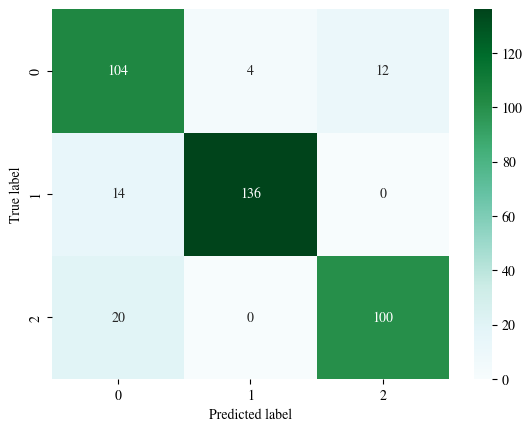

In [12]:
rfc_time = make_pipeline(rfc_grid_search.best_estimator_)
rfc_time.fit(X_time_train, y_time_train)
y_time_pred = rfc_time.predict(X_time_test)
y_time_pred_prob = rfc_time.predict_proba(X_time_test)
rfc_time_result = confusion_matrix(y_time_test, y_time_pred)
print(rfc_time_result)
rfc_time_result1 = classification_report(y_time_test, y_time_pred)
print("Classification report: ")
print(rfc_time_result1)
rfc_time_acc = accuracy_score(y_time_test,y_time_pred)
print("Accuracy: ", rfc_time_acc)

confusion_matrix_plot(rfc_time_result, "Random Forest", 0)


In [13]:
# Hyper parameter tuning for knn - COMMENT OUT IF YOU DON'T WANT TO RUN (TAKES A LONG TIME)
n_neighbors = list(range(1,5))
p = [1,2]
#Convert to dictionary
hyperparameters = dict( n_neighbors=n_neighbors, p=p)

#Create new KNN object
knn_2 = KNeighborsClassifier()#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=tscv, verbose=2)

#Fit the model
knn_grid_search = clf.fit(X_time_train,y_time_train)
#Print The value of best Hyperparameters
#print('Best leaf_size:', knn_grid_search.best_estimator_.get_params()['leaf_size'])
print('Best p:', knn_grid_search.best_estimator_.get_params()['p'])
print('Best n_neighbors:', knn_grid_search.best_estimator_.get_params()['n_neighbors'])

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] END .................................n_neighbors=1, p=1; total time=   0.7s
[CV] END .................................n_neighbors=1, p=1; total time=   1.5s
[CV] END .................................n_neighbors=1, p=1; total time=   2.2s
[CV] END .................................n_neighbors=1, p=1; total time=   2.6s
[CV] END .................................n_neighbors=1, p=1; total time=   3.2s
[CV] END .................................n_neighbors=1, p=2; total time=   0.0s
[CV] END .................................n_neighbors=1, p=2; total time=   0.1s
[CV] END .................................n_neighbors=1, p=2; total time=   0.2s
[CV] END .................................n_neighbors=1, p=2; total time=   0.3s
[CV] END .................................n_neighbors=1, p=2; total time=   0.3s
[CV] END .................................n_neighbors=2, p=1; total time=   0.6s
[CV] END .................................n_neigh

In [14]:
knn_grid_search.best_params_

{'n_neighbors': 3, 'p': 1}

Confusion Matrix: 
[[109   5   6]
 [  5 145   0]
 [ 42   0  78]]
Classification report: 
              precision    recall  f1-score   support

         0.0       0.70      0.91      0.79       120
         1.0       0.97      0.97      0.97       150
         2.0       0.93      0.65      0.76       120

    accuracy                           0.85       390
   macro avg       0.86      0.84      0.84       390
weighted avg       0.87      0.85      0.85       390

Accuracy:  0.8512820512820513


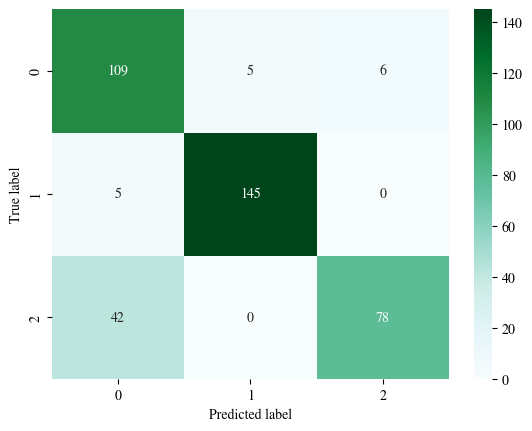

In [15]:
knn = make_pipeline(StandardScaler(),knn_grid_search.best_estimator_)
knn.fit(X_time_train, y_time_train)
y_time_pred = knn.predict(X_time_test)
y_time_pred_prob = knn.predict_proba(X_time_test)
knn_time_result = confusion_matrix(y_time_test, y_time_pred)
print("Confusion Matrix: ")
print(knn_time_result)
knn_class_report = classification_report(y_time_test, y_time_pred)
print("Classification report: ")
print(knn_class_report)
knn_acc = accuracy_score(y_time_test,y_time_pred)
print("Accuracy: ",knn_acc)

confusion_matrix_plot(knn_time_result, "KNN", 0)

In [16]:

svc_param_grid = { 
    # Regularization parameter.
    "C": [1, 2, 5],
    # Kernel type
    "kernel": ['rbf', 'poly'],
    # Gamma is the Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’.
    "gamma": [1, 2, 5],
    }

svc = SVC(random_state=1234)
svc_grid_search = GridSearchCV(estimator=svc, param_grid=svc_param_grid, cv=tscv, verbose=3)
svc_grid_search.fit(X_time_train, y_time_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV 1/5] END ............C=1, gamma=1, kernel=rbf;, score=nan total time=   0.0s
[CV 2/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.000 total time=   4.5s
[CV 3/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.531 total time=  21.2s
[CV 4/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.142 total time=  40.4s
[CV 5/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.392 total time= 1.2min
[CV 1/5] END ...........C=1, gamma=1, kernel=poly;, score=nan total time=   0.0s
[CV 2/5] END .........C=1, gamma=1, kernel=poly;, score=0.000 total time=   5.4s
[CV 3/5] END .........C=1, gamma=1, kernel=poly;, score=0.535 total time=  16.4s
[CV 4/5] END .........C=1, gamma=1, kernel=poly;, score=0.131 total time=  34.3s
[CV 5/5] END .........C=1, gamma=1, kernel=poly;, score=0.435 total time= 1.0min
[CV 1/5] END ............C=1, gamma=2, kernel=rbf;, score=nan total time=   0.0s
[CV 2/5] END ..........C=1, gamma=2, kernel=rbf;

C:\Users\Abdus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
18 fits failed out of a total of 90.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
18 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Abdus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Abdus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\

GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
             estimator=SVC(random_state=1234),
             param_grid={'C': [1, 2, 5], 'gamma': [1, 2, 5],
                         'kernel': ['rbf', 'poly']},
             verbose=3)

In [17]:
svc_grid_search.best_params_

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}

In [18]:
poly = make_pipeline(svc_grid_search.best_estimator_)
poly.fit(X_time_train, y_time_train)
poly_pred = poly.predict(X_time_test)

Classification report: 
              precision    recall  f1-score   support

         0.0       0.70      0.82      0.75       120
         1.0       0.92      0.97      0.95       150
         2.0       0.87      0.67      0.75       120

    accuracy                           0.83       390
   macro avg       0.83      0.82      0.82       390
weighted avg       0.84      0.83      0.83       390

Accuracy:  0.8307692307692308


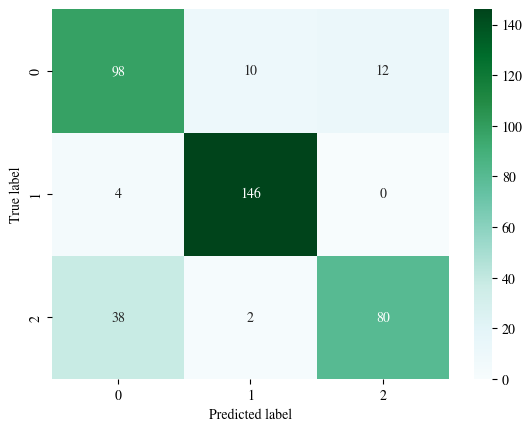

In [19]:
poly_result = confusion_matrix(y_time_test, poly_pred)
poly_classification_rep = classification_report(y_time_test, poly_pred)
print("Classification report: ")
print(poly_classification_rep)
poly_acc = accuracy_score(y_time_test,poly_pred)
print("Accuracy: ", poly_acc)
confusion_matrix_plot(poly_result, "SVM", 0)

In [9]:
from keras import models, layers, initializers, utils, callbacks
import tensorflow as tf

In [10]:
train_labels = utils.to_categorical(y_time_train)
train_labels.shape

(1560, 3)

In [11]:
model = models.Sequential(
    [
        layers.Input(shape=(X_time_train.shape[1],1)),
        layers.Conv1D(16, 10, strides=3, activation='relu'),
        layers.MaxPool1D(pool_size=3, strides=3),
        layers.Conv1D(16, 5, strides=2, activation='relu'),
        layers.MaxPool1D(pool_size=2, strides=2),
        #layers.SpatialDropout1D(0.6),
        layers.Flatten(),
        layers.Dense(256, activation='linear'),
        layers.Dense(64, activation='linear'),
        layers.Dropout(0.6),
        layers.Dense(3, activation="softmax")
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 3331, 16)          176       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 1110, 16)         0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 553, 16)           1296      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 276, 16)          0         
 1D)                                                             
                                                                 
 flatten (Flatten)           (None, 4416)              0         
                                                                 
 dense (Dense)               (None, 256)               1

In [12]:
es = callbacks.EarlyStopping(monitor='val_accuracy', patience=10)
model.compile(loss="categorical_crossentropy", 
              optimizer="adam", 
              metrics=["accuracy"])

history = model.fit(X_time_train, train_labels,
                    batch_size=64, 
                    epochs=100, 
                    validation_split=0.1,
                    callbacks=[es])

Epoch 1/100
22/22 [==============================] - 8s 243ms/step - loss: 1.0420 - accuracy: 0.4544 - val_loss: 1.1007 - val_accuracy: 0.1859
Epoch 2/100
22/22 [==============================] - 4s 193ms/step - loss: 0.8037 - accuracy: 0.6368 - val_loss: 1.2116 - val_accuracy: 0.2628
Epoch 3/100
22/22 [==============================] - 6s 259ms/step - loss: 0.5863 - accuracy: 0.7692 - val_loss: 0.5722 - val_accuracy: 0.6474
Epoch 4/100
22/22 [==============================] - 5s 212ms/step - loss: 0.5098 - accuracy: 0.7892 - val_loss: 0.2937 - val_accuracy: 0.8846
Epoch 5/100
22/22 [==============================] - 5s 215ms/step - loss: 0.5000 - accuracy: 0.7906 - val_loss: 0.8696 - val_accuracy: 0.4936
Epoch 6/100
22/22 [==============================] - 3s 159ms/step - loss: 0.4725 - accuracy: 0.8134 - val_loss: 0.4058 - val_accuracy: 0.7885
Epoch 7/100
22/22 [==============================] - 3s 149ms/step - loss: 0.4333 - accuracy: 0.8376 - val_loss: 0.2327 - val_accuracy: 0.9038

In [13]:
test_labels  = utils.to_categorical(y_time_test)

In [14]:
loss, acc = model.evaluate(X_time_test, test_labels, batch_size=64)
loss,acc

7/7 [==============================] - 0s 36ms/step - loss: 0.3593 - accuracy: 0.8564


(0.3592771589756012, 0.8564102649688721)

In [15]:
y_pred = np.argmax(model.predict(X_time_test), axis=1)

13/13 [==============================] - 1s 23ms/step


In [16]:
cnn_cm = confusion_matrix(y_time_test, y_pred)

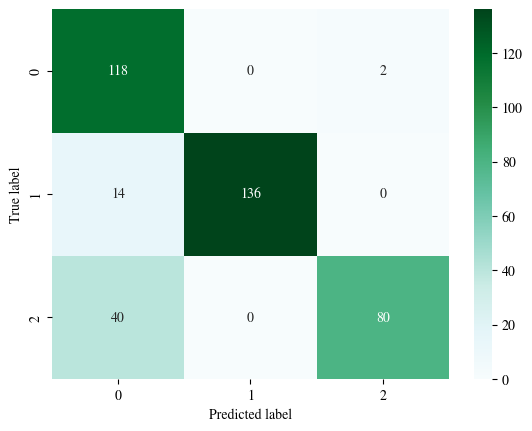

In [17]:
confusion_matrix_plot(cnn_cm, "CNN", 0)

In [18]:
cnn_class_report = classification_report(y_time_test, y_pred)
print(cnn_class_report)

              precision    recall  f1-score   support

         0.0       0.69      0.98      0.81       120
         1.0       1.00      0.91      0.95       150
         2.0       0.98      0.67      0.79       120

    accuracy                           0.86       390
   macro avg       0.89      0.85      0.85       390
weighted avg       0.90      0.86      0.86       390



In [19]:
import pandas as pd 
df = pd.DataFrame(history.history)

df

,loss,accuracy,val_loss,val_accuracy
0,1.042035,0.454416,1.100651,0.185897
1,0.803721,0.636752,1.211621,0.262821
2,0.586304,0.769231,0.572166,0.647436
3,0.509788,0.789174,0.293687,0.884615
4,0.500008,0.790598,0.869572,0.493590
5,0.472517,0.813390,0.405849,0.788462
6,0.433330,0.837607,0.232676,0.903846
7,0.412521,0.837607,0.443485,0.775641
8,0.419041,0.837607,0.303642,0.871795
9,0.393649,0.845442,0.389051,0.814103


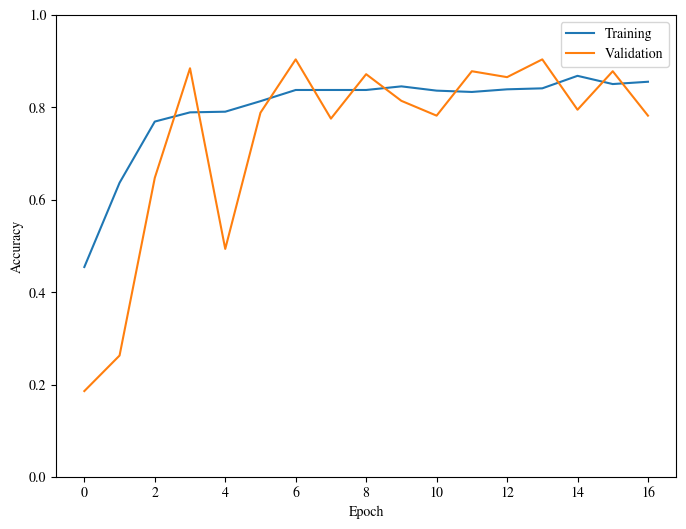

In [20]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(df['accuracy'], label="Training")
ax.plot(df['val_accuracy'], label="Validation")
ax.set_ylim(ymin=0,ymax=1)
ax.set_xlabel("Epoch")
ax.set_ylabel("Accuracy")
ax.legend(loc='best')
plt.show()

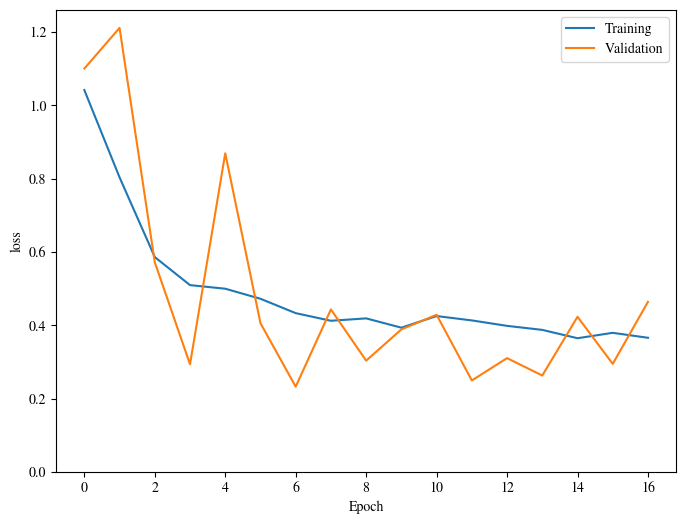

In [21]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(df['loss'], label="Training")
ax.plot(df['val_loss'], label="Validation")
ax.set_ylim(ymin=0)
ax.set_xlabel("Epoch")
ax.set_ylabel("loss")
ax.legend(loc='best')
plt.show()